In [ ]:
!pip install MultiColumnLabelEncoder

In [3]:
!pip install xgboost

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MultiColumnLabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pickle

In [55]:
data=pd.read_csv('garments_worker_productivity.csv')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [56]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [58]:
data.shape

(1197, 15)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [60]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [61]:
data.drop(['wip'],axis=1,inplace=True)

In [62]:
data['date']=pd.to_datetime(data['date'])
data.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [ ]:
data['month']=data['date'].dt.month
data.drop(['date'],axis=1,inplace=True)
data.month

0       1
1       1
2       1
3       1
4       1
       ..
1192    3
1193    3
1194    3
1195    3
1196    3
Name: month, Length: 1197, dtype: int32

In [65]:
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [66]:
data['department']=data['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sweing')
data['department'].value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

In [67]:
Mcle=MultiColumnLabelEncoder.MultiColumnLabelEncoder()
data=Mcle.fit_transform(data)


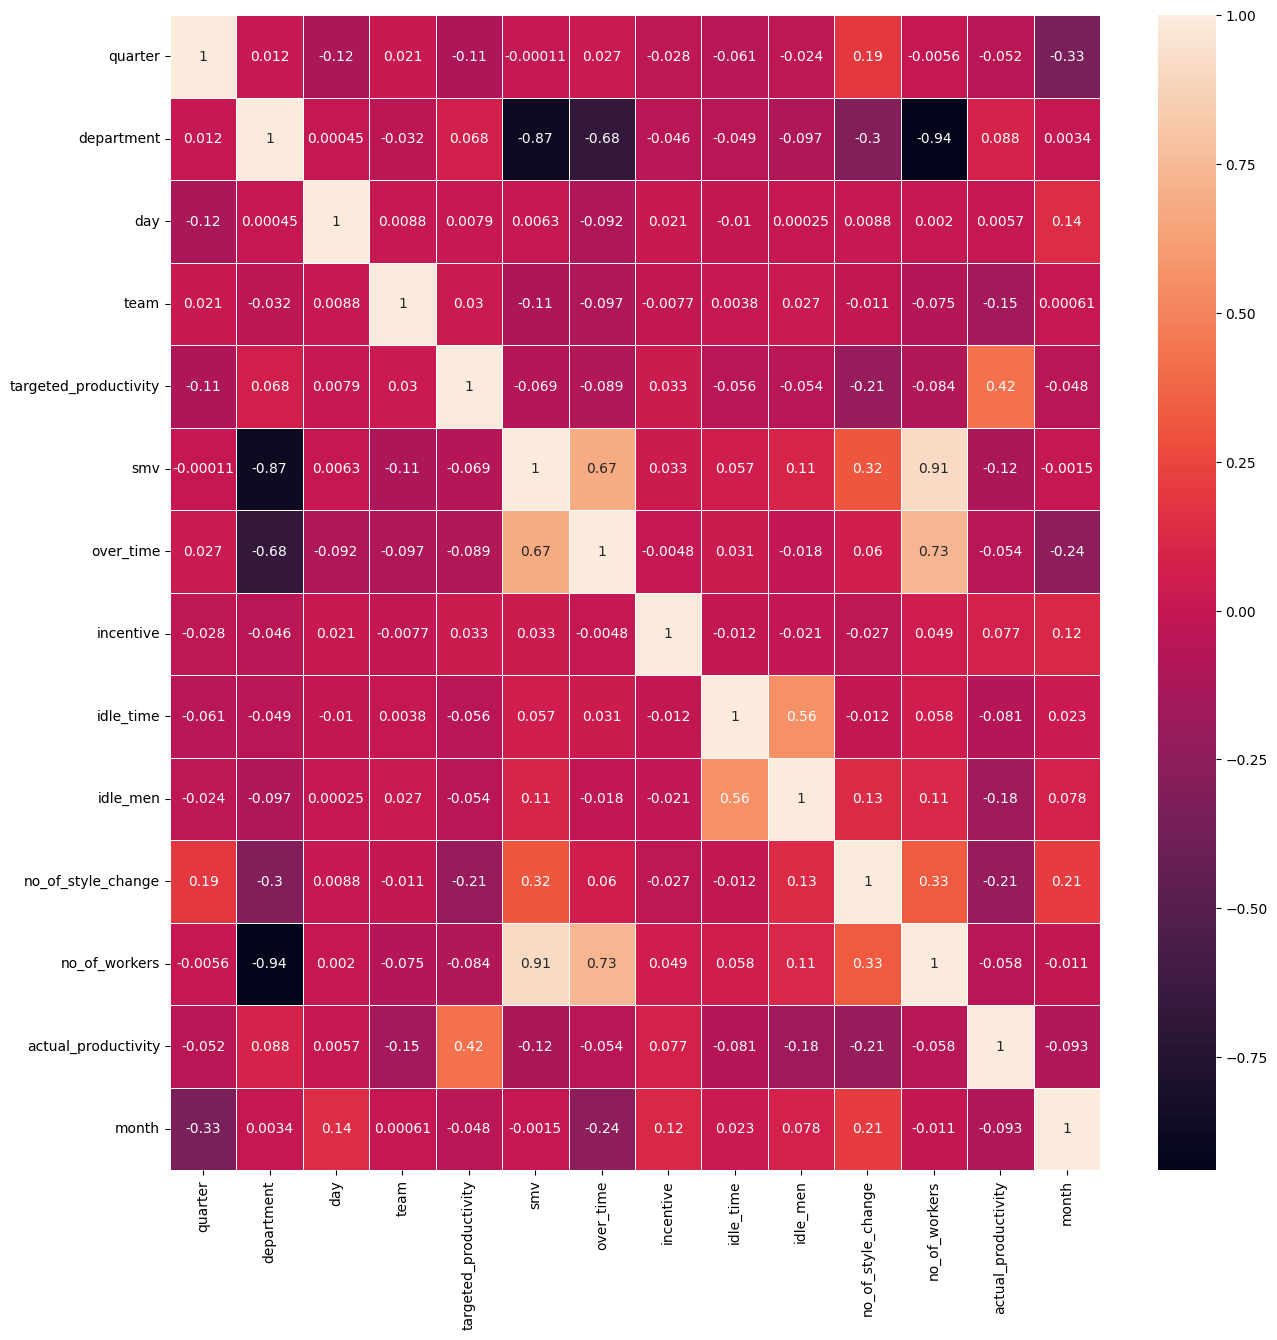

In [68]:
corrMatrix=data.corr()
fig, ax= plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, linewidths=0.5, ax=ax)
plt.show()

In [48]:
x=data.drop(['actual_productivity'],axis=1)
y=data['actual_productivity']
X=x.to_numpy()
X

array([[ 0. ,  0. ,  0. , ...,  0. , 59. ,  1. ],
       [ 0. ,  1. ,  0. , ...,  0. ,  8. ,  1. ],
       [ 0. ,  0. ,  0. , ...,  0. , 30.5,  1. ],
       ...,
       [ 1. ,  1. ,  5. , ...,  0. ,  8. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. , 15. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. ,  6. ,  3. ]])

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
pred_test=model_lr.predict(x_test)
print("test_MSE:",mean_squared_error(y_test,pred_test))
print("test_MAE:",mean_absolute_error(y_test,pred_test))
print("R2_Score:{}".format(r2_score(y_test,pred_test)))

test_MSE: 0.023506666338900563
test_MAE: 0.11118106290915206
R2_Score:0.2135098037998856


In [51]:
model_rf=RandomForestRegressor(n_estimators=200, max_depth=5)
model_rf.fit(x_train,y_train)
pred=model_rf.predict(x_test)

print("test_MSE:",mean_squared_error(y_test,pred))
print("test_MAE:",mean_absolute_error(y_test,pred))
print("R2_Score:{}".format(r2_score(y_test,pred)))

test_MSE: 0.01728856586542333
test_MAE: 0.08551854993615857
R2_Score:0.42155610823413103


In [69]:
model_xgb = xgb.XGBRegressor(n_estimators = 200, max_depth=5,learning_rate = 0.1)
model_xgb.fit(x_train,y_train)
pred3=model_xgb.predict(x_test)
print("test_MSE:",mean_squared_error(y_test,pred3))
print("test_MAE:",mean_absolute_error(y_test,pred3))
print("R2_Score:{}".format(r2_score(y_test,pred3)))

test_MSE: 0.017241769266788904
test_MAE: 0.08002055997362985
R2_Score:0.42312183710060913


In [75]:
with open('model_xgb.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)



In [76]:
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

In [77]:
with open('model_lr.pkl', 'wb') as file:
    pickle.dump(model_lr, file)